In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

In [4]:
df = pd.read_csv('istherecorrelation.csv', delimiter=';', decimal=',', dtype=float)
df

,Year,WO [x1000],NL Beer consumption [x1000 hectoliter]
0,2006.0,205.9,11402.0
1,2007.0,208.6,11492.0
2,2008.0,212.7,11450.0
3,2009.0,220.5,11502.0
4,2010.0,233.2,11474.0
5,2011.0,242.4,11480.0
6,2012.0,245.4,11452.0
7,2013.0,241.4,11484.0
8,2014.0,250.2,11555.0
9,2015.0,255.7,11601.0


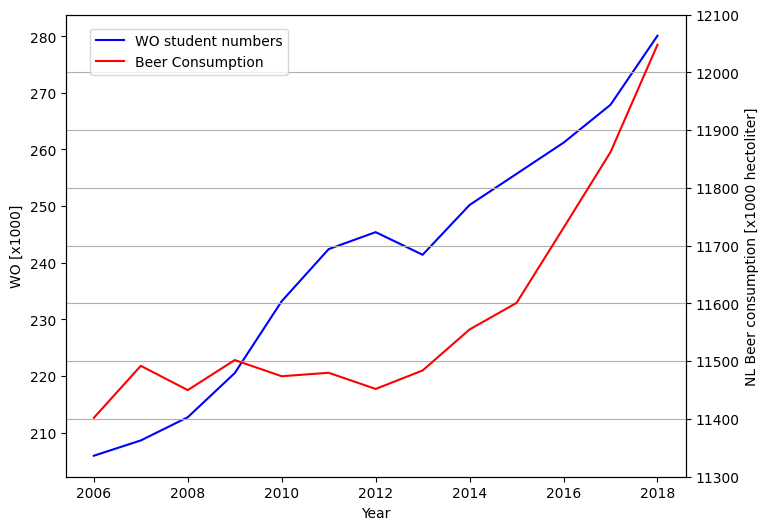

In [5]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx()  
ax2.set_ylim(11300, 12100)

ax1.plot(df.iloc[:,0], df.iloc[:,1], label = 'WO student numbers', c = 'b')
ax2.plot(df.iloc[:,0], df.iloc[:,2], label = 'Beer Consumption', c = 'r')
ax1.set_xlabel(df.columns[0])
ax1.set_ylabel(df.columns[1])
ax2.set_ylabel(df.columns[2])
fig.legend(loc='upper right', bbox_to_anchor=(0.37,0.985), bbox_transform=ax1.transAxes)
plt.grid()
plt.savefig('Line')


Pearson Correlation Coefficient: R=0.8181


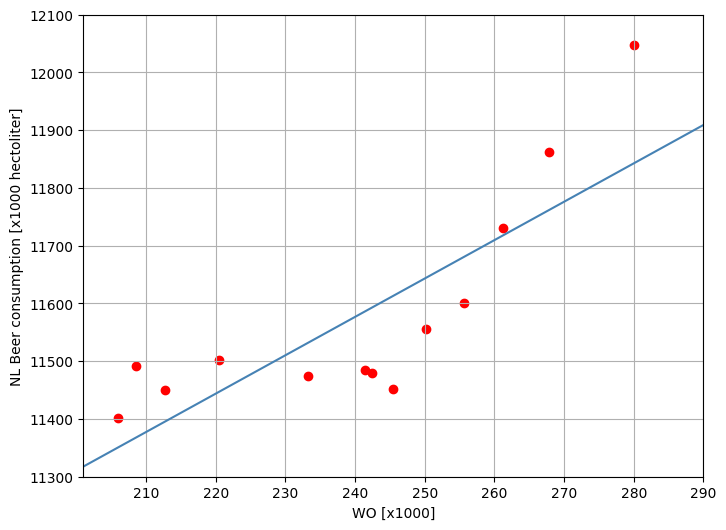

In [10]:
pearson_corr, _ = pearsonr(df.iloc[:,1], df.iloc[:,2])

def func(x, alpha, beta): 
    return alpha + beta*x

popt, pcov = curve_fit(func, df.iloc[:,1], df.iloc[:,2])
a_opt, b_opt = popt
x = np.linspace(201, 290, 300)

fig = plt.figure(figsize=(8, 6))
plt.plot(x, func(x, a_opt, b_opt), 200, c = 'steelblue')
plt.scatter(df.iloc[:,1], df.iloc[:,2], c = 'r')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.xlim([201, 290])
plt.ylim([11300, 12100])
plt.grid()
plt.savefig('Corr')

print(f"Pearson Correlation Coefficient: R={pearson_corr:.4f}")